In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(X.shape)

(506, 13)


In [6]:
df = pd.DataFrame(X, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSAT']) #converts ndarray to dataframe
#CRIM- per capita crime rate by town
#ZN - proportion of residential land zoned for plots over 25,000 sq. ft.
#INDUS - proportion of non-retails business acres per town
#CHAS 1 if river bound , else 0
#NOX - parts per 10 million
#RM - avg number of rooms per dwelling
#AGE - proportion of owner occupied units built prior to 1940
#DIS - rated distances to 5 boston employment centers
#RAD - index of accessibility to radial highways
#TAX - full value property tax rate per 10,000
#PTRATIO - pupil-teacher ration by town
#B - black population proportion
#LSAT - % lower status of the population
#MEDV - median value of owner occupied homes in 1000's

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['MEDV']= y

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.describe() #50% is median, we can compare mean and median to see if they are similar, data is normal otherwise not
#id std is substantially larger than the mean, it means the data is very noisy
# we can also compare min/max to mean
#we would also want to have means of various features in similar range, which is not the case here

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


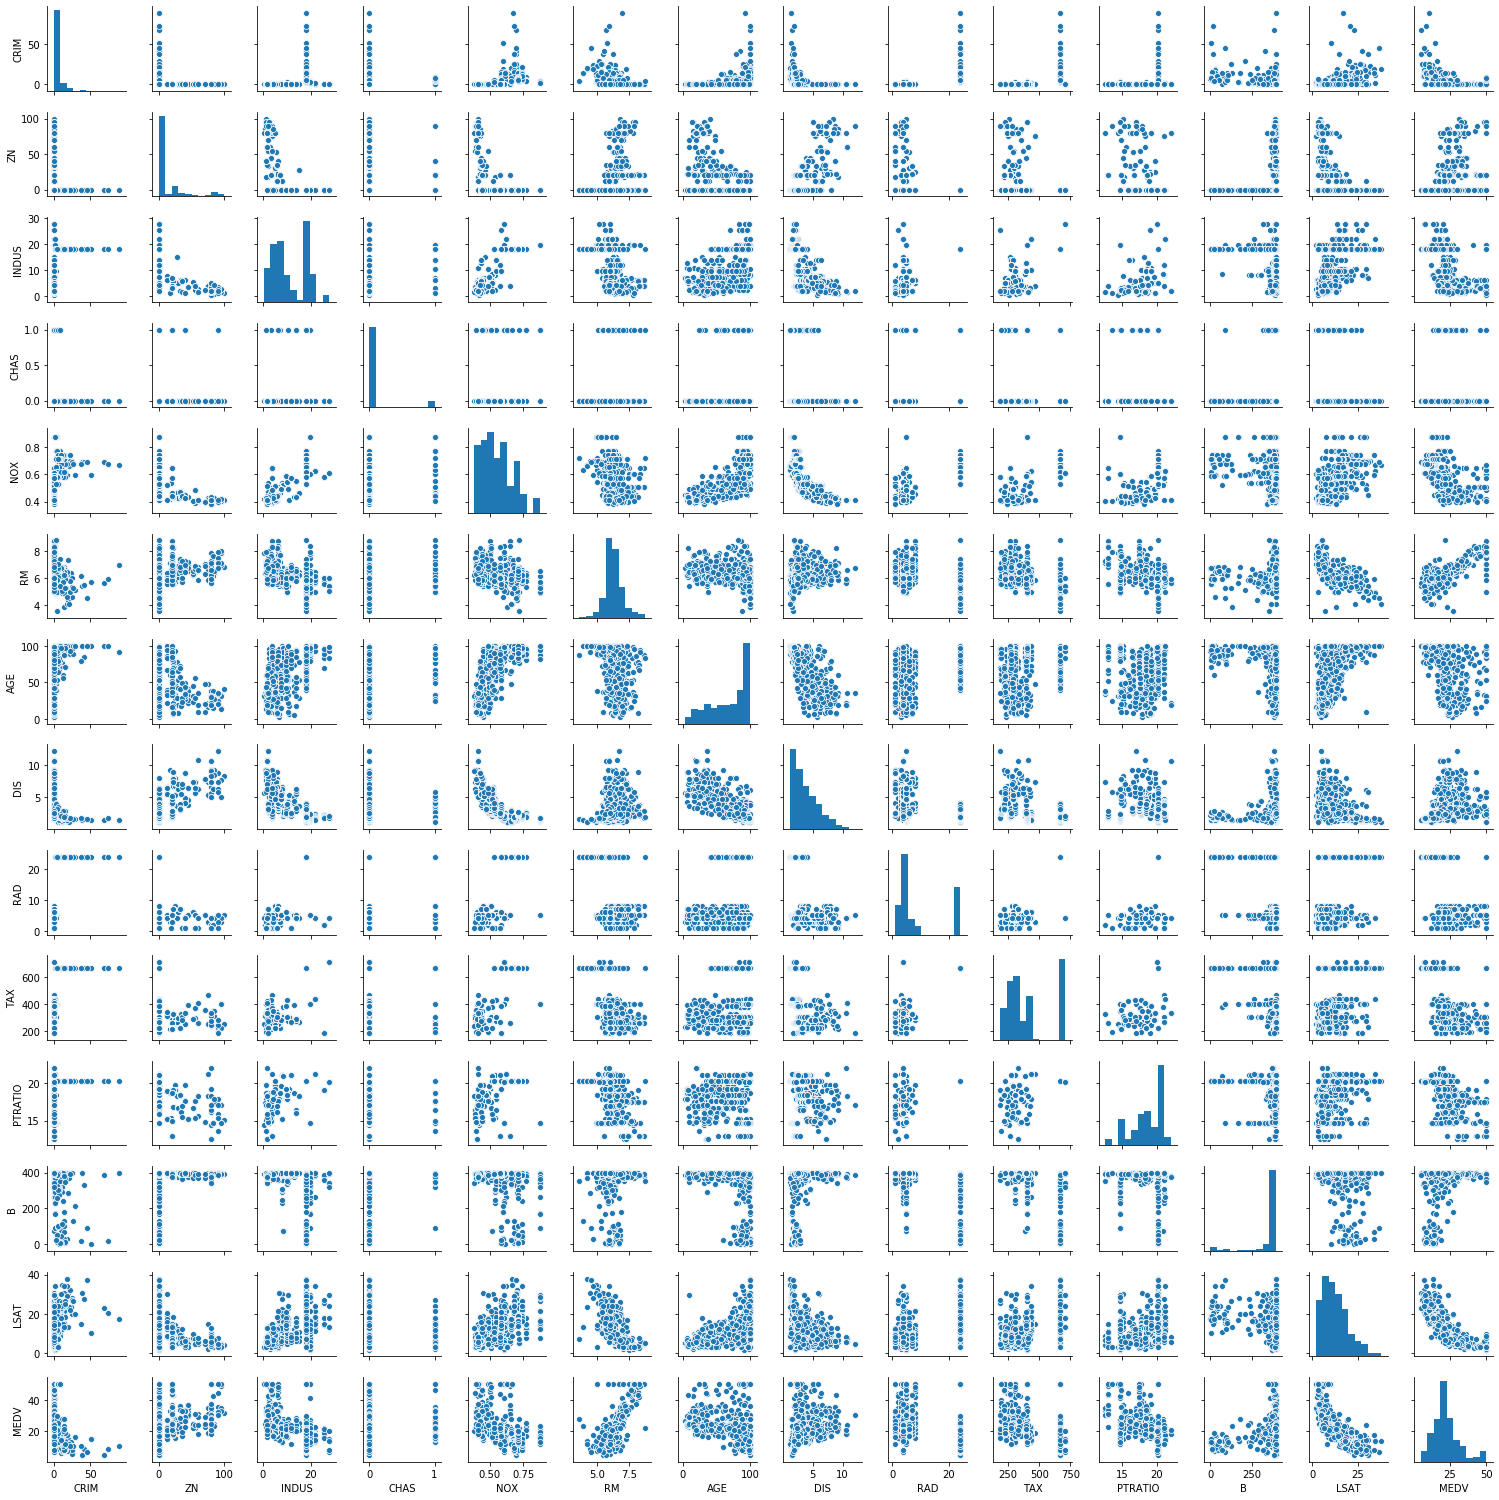

In [11]:
sns.pairplot(df, height = 1.5)

In [12]:
col_study = ['CRIM','ZN', 'INDUS','NOX','RM']

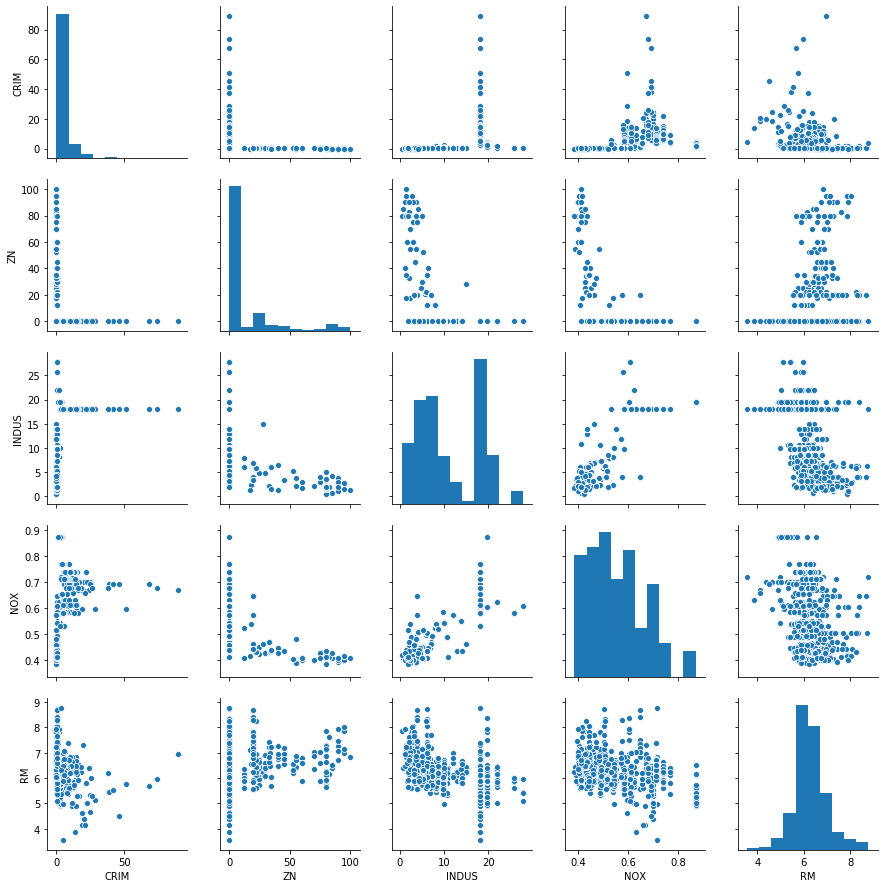

In [13]:
sns.pairplot(df[col_study], height=2.5)

In [14]:
col_study = ['PTRATIO', 'B','LSAT','MEDV']

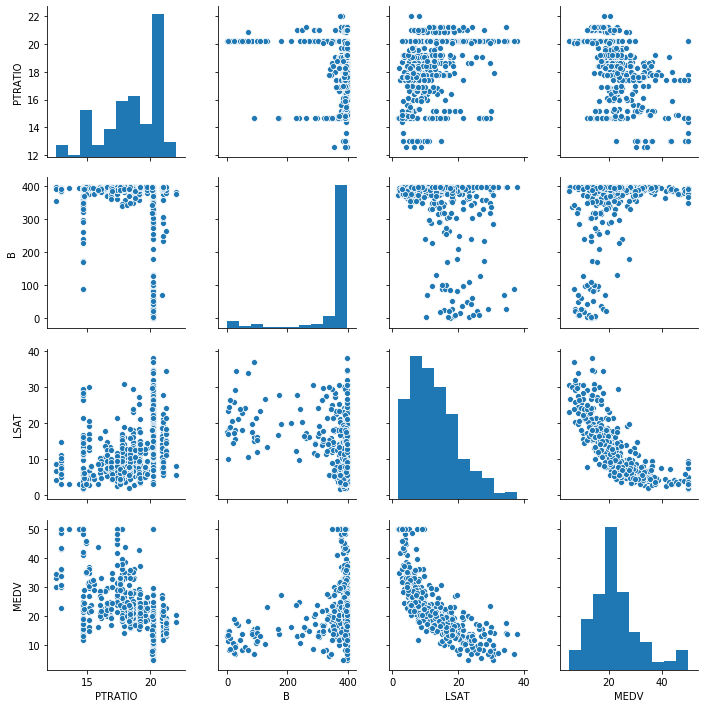

In [15]:
sns.pairplot(df[col_study], height=2.5)

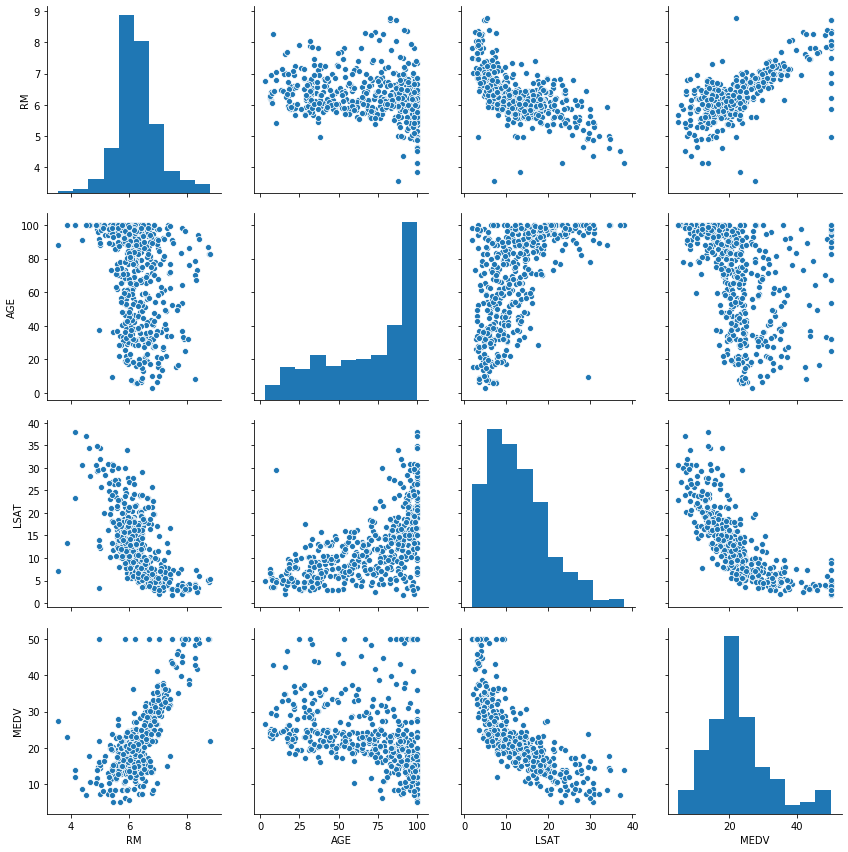

In [16]:
col = ['RM','AGE','LSAT','MEDV']
sns.pairplot(df[col],height=3)

In [17]:
pd.options.display.float_format='{:,.2f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


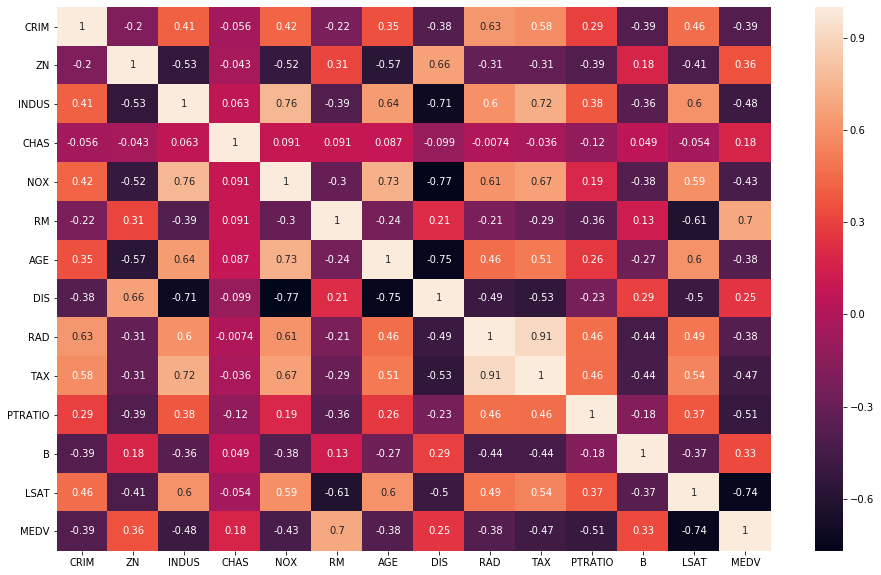

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
#we will look at features with corellations coefficients aore than 0.5 or less than -0.5

In [19]:
#trying out linear regression
X= df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.coef_

array([9.10210898])

In [23]:
model.intercept_

-34.67062077643857

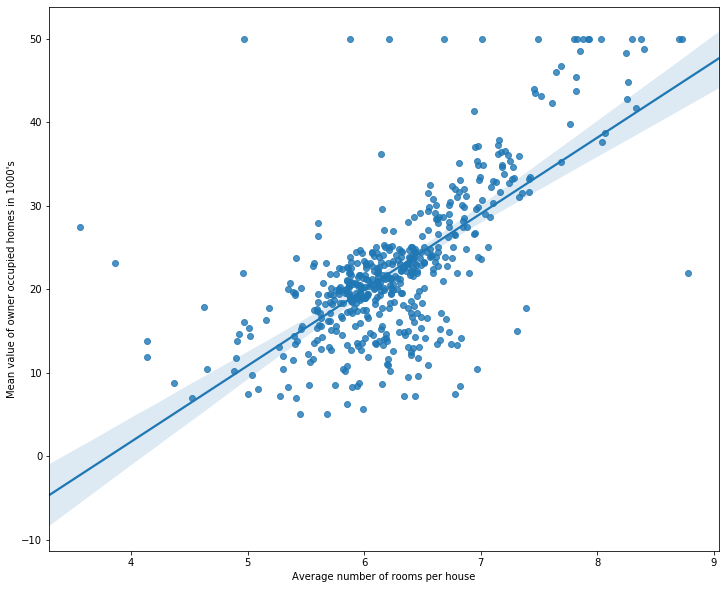

In [24]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel("Average number of rooms per house")
plt.ylabel("Mean value of owner occupied homes in 1000's")
plt.show()

<Figure size 864x720 with 0 Axes>

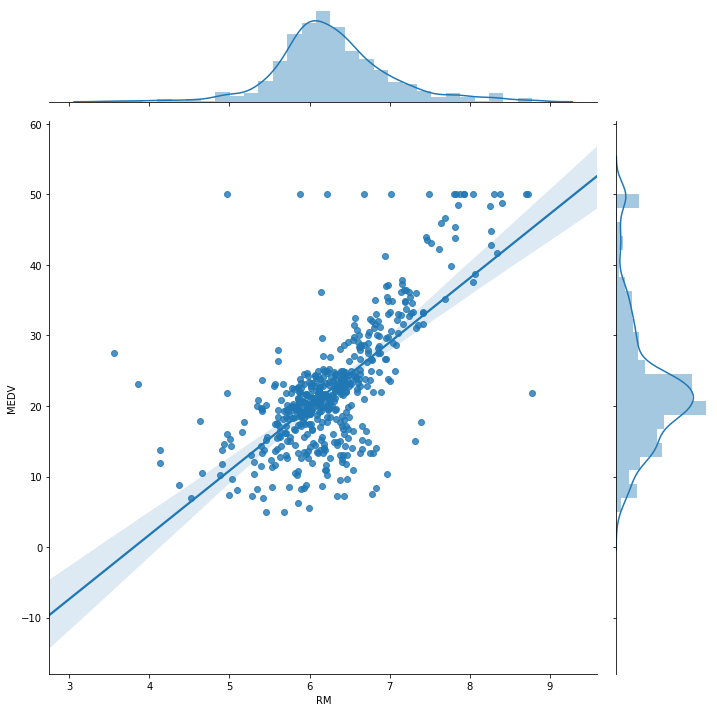

In [25]:
plt.figure(figsize=(12,10))
sns.jointplot(x= 'RM', y ='MEDV', data=df, kind='reg', height = 10)

In [26]:
model.predict(np.array([7]).reshape(-1,1))

array([29.04414209])

In [27]:
#multilinear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
X= load_boston()

In [29]:
df1 = pd.DataFrame(X.data, columns = X.feature_names)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [30]:
X1 = df1
y1 = X.target

In [31]:
X1_constant = sm.add_constant(X1)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
X1_constant = pd.DataFrame(X1_constant)

In [34]:
model1 = sm.OLS(y, X1_constant)

In [35]:
lr = model1.fit()

In [36]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        15:55:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
X_train,X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25)

In [38]:
#from the above summary we note that the p value for INDUS & AGE are very large and thus we can drop them
model2 = smf.ols(formula = 'y_train~CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=X_train)
mlr = model2.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     93.96
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.51e-99
Time:                        15:56:21   Log-Likelihood:                -1117.8
No. Observations:                 379   AIC:                             2260.
Df Residuals:                     367   BIC:                             2307.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9673      5.855      5.801      0.000      22.453      45.481
CRIM          -0.1175      0.036     -3.280      0.001      -0.188      -0.047
ZN             0.0463      0.016      2.919      0.004       0.015       0.077
CHAS           2.5688      1.067      2.407      0.017       0.470       4.667
NOX          -18.8795      3.999     -4.721      0.000     -26.743     -11.016
RM             3.9270      0.466      8.420      0.000       3.010       4.844
DIS           -1.5293      0.214     -7.133      0.000      -1.951      -1.108
RAD            0.3335      0.070      4.799      0.000       0.197       0.470
TAX           -0.0117      0.004     -3.187      0.002      -0.019      -0.004
PTRATIO       -0.8707      0.149     -5.843      0.000      -1.164      -0.578
B              0.0113      0.003      3.579      0.000       0.005       0.018
LSTAT         -0.5035      0.053     -9.448      0.000      -0.608      -0.399
==============================================================================
Omnibus:                      121.580   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.112
Skew:                           1.379   Prob(JB):                    2.73e-101
Kurtosis:                       7.660   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
mlr.params

Intercept    33.97
CRIM         -0.12
ZN            0.05
CHAS          2.57
NOX         -18.88
RM            3.93
DIS          -1.53
RAD           0.33
TAX          -0.01
PTRATIO      -0.87
B             0.01
LSTAT        -0.50
dtype: float64

In [40]:
#Since the condition number for this model is > 30, there is the problem of multicoliniarity present
#In order to check the same, we will identify correlation between features
corr_matrix = X1_constant.corr()
corr_matrix

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CRIM,nan,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,nan,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,nan,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,nan,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,nan,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,nan,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,nan,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,nan,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,nan,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49


In [41]:
corr_matrix[np.abs(corr_matrix)<0.6] = 0
corr_matrix

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CRIM,nan,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00
ZN,nan,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00
INDUS,nan,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60
CHAS,nan,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,nan,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00
RM,nan,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61
AGE,nan,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60
DIS,nan,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00
RAD,nan,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00


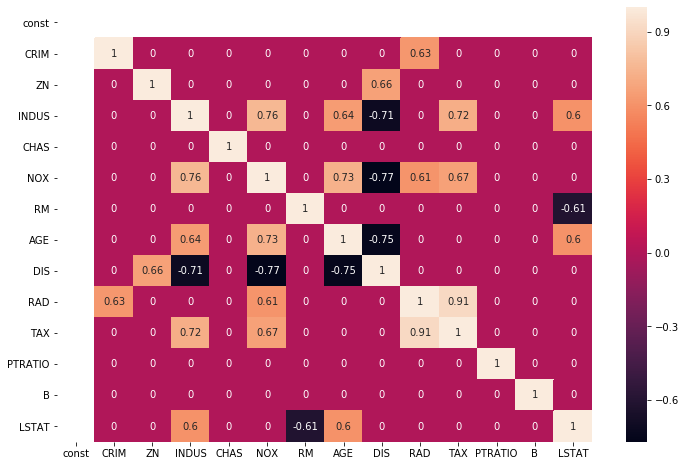

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)

In [43]:
#We can detect colliniarity using eigen values
eigenvalues, eigenvectors = np.linalg.eig(df.corr())
eigenvectors

array([[ 2.42284451e-01, -6.58731079e-02,  3.95077419e-01,
         1.00366211e-01,  4.95765921e-03,  2.24627030e-01,
         7.77083366e-01,  1.57401402e-01, -5.91141759e-02,
        -9.70323119e-02, -2.54211798e-01,  7.13846149e-02,
        -6.32761157e-02, -7.10687807e-02],
       [-2.45435005e-01, -1.48002653e-01,  3.94545713e-01,
         3.42958421e-01,  1.14495002e-01,  3.35746944e-01,
        -2.74178365e-01, -3.80314042e-01,  9.62968067e-02,
         1.32375830e-01, -3.82899480e-01, -2.45579673e-01,
         2.21122101e-01, -1.27709065e-01],
       [ 3.31859746e-01,  1.27075668e-01, -6.60819134e-02,
        -9.62693566e-03, -2.25836917e-02,  8.08249519e-02,
        -3.40273839e-01,  1.71745781e-01,  2.35472877e-01,
        -8.37168543e-02, -6.27048264e-01,  2.54827026e-01,
        -3.48408284e-01,  2.73797614e-01],
       [-5.02713285e-03,  4.10668763e-01, -1.25305293e-01,
         7.00406497e-01, -5.35197817e-01, -1.62649056e-01,
         7.40757751e-02, -3.29270041e-02, -2.

In [44]:
pd.Series(eigenvalues).sort_values()

8    0.06
9    0.13
12   0.18
13   0.21
11   0.25
10   0.28
7    0.40
6    0.54
5    0.66
4    0.85
3    0.89
2    1.35
1    1.65
0    6.55
dtype: float64

In [45]:
#we take eigen vectors corressponding to smallest eigen value
#larger eigenvectors indicate larger colliniarity
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.70
8    0.63
2    0.24
13   0.13
1    0.10
4    0.09
12   0.08
0    0.06
10   0.06
7    0.05
6    0.04
3    0.02
11   0.02
5    0.01
dtype: float64

In [46]:
#therefore we can take out feature 9,8 and 2
print(df.columns[9],df.columns[8],df.columns[2])

TAX RAD INDUS


In [52]:
model2 = smf.ols(formula = 'y_train~ CRIM + ZN + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT', data = X_train)
mlr = model2.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.06e-96
Time:                        15:59:21   Log-Likelihood:                -1129.5
No. Observations:                 379   AIC:                             2279.
Df Residuals:                     369   BIC:                             2318.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0525      5.731      4.546      0.000      14.784      37.321
CRIM          -0.0606      0.034     -1.801      0.073      -0.127       0.006
ZN             0.0422      0.016      2.698      0.007       0.011       0.073
CHAS           3.0178      1.093      2.761      0.006       0.869       5.167
NOX          -16.8815      3.745     -4.508      0.000     -24.245      -9.518
RM             4.3646      0.471      9.275      0.000       3.439       5.290
DIS           -1.4544      0.219     -6.650      0.000      -1.885      -1.024
PTRATIO       -0.7267      0.138     -5.277      0.000      -0.998      -0.456
B              0.0092      0.003      2.894      0.004       0.003       0.015
LSTAT         -0.4997      0.055     -9.143      0.000      -0.607      -0.392
==============================================================================
Omnibus:                      130.339   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.760
Skew:                           1.466   Prob(JB):                    6.80e-115
Kurtosis:                       7.969   Cond. No.                     9.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#We can calculate mse or r2 score for determining the efficiency
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

In [74]:
print ("test mse error", mse_test)
print("train mse error",mse_train)
print ("test r2_score", r2_test)
print("train r2_score",r2_train)

test mse error 23.768776475542648
train mse error 22.709105079751733
test r2_score 0.7438427666827632
train r2_score 0.7212731306989384


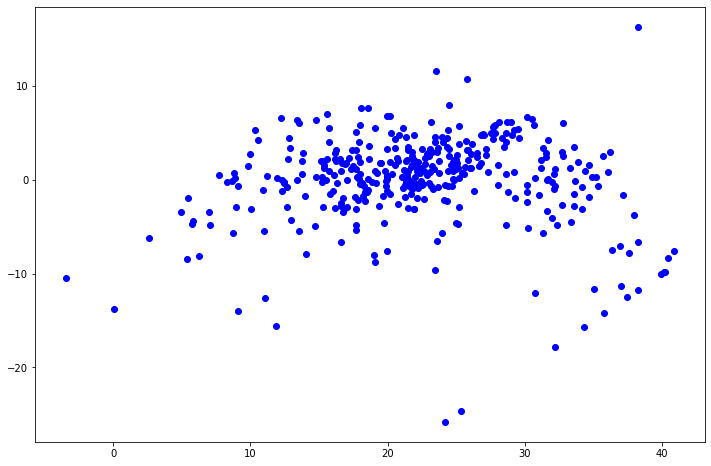

In [81]:
#ploting the values to check outliers
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker = 'o', label = "Training data")


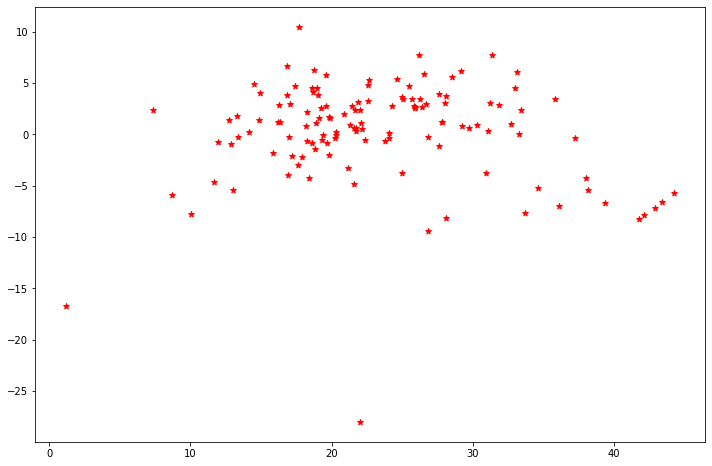

In [83]:
plt.figure(figsize=(12,8))
plt.scatter(y_test_pred, y_test_pred-y_test, c='red', marker = '*', label = "Testing data")

In [99]:
#Regularized regression can be used if there is too much collinearity or a lot of outliers
#Regularised regression includes methods like Ridge regression(L2 regularisation), LASSO(L1 regularisation) and netelastic
#Let us try applying regularised models
from sklearn.linear_model import Ridge
en_model = Ridge(alpha = 0.02, normalize = True)
en_model.fit(X_train, y_train)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [100]:
y_test_pred_en = en_model.predict(X_test)
y_train_pred_en = en_model.predict(X_train)

In [101]:
mse_test_en = mean_squared_error(y_test, y_test_pred_en)
mse_train_en = mean_squared_error(y_train, y_train_pred_en)
r2_test_en = r2_score(y_test, y_test_pred_en)
r2_train_en = r2_score(y_train, y_train_pred_en)

In [102]:
print ("test mse error", mse_test_en)
print ("train mse error",mse_train_en)
print ("test r2_score", r2_test_en)
print ("train r2_score",r2_train_en)
#since the test scores didn't improve by using regularisation, it is better not to use them as it might lead to overfitting

test mse error 24.079449469205837
train mse error 21.406668446731423
test r2_score 0.7404946290701674
train r2_score 0.737258969150514


In [178]:
#next we will try out Polynomial regression
#creating a function for trying out different degrees of polynomial
from sklearn.preprocessing import PolynomialFeatures
def polyReg(degree):
    #transforming features to higher degree
    poly_reg = PolynomialFeatures(degree)
    X_poly_train = poly_reg.fit_transform(X_train)
    
    #instanciating model and fitting
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly_train,y_train)
    
    #predicting based on higher degree features
    y_pred_train_poly = lin_reg_2.predict(X_poly_train)
    y_pred_test_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))
    
    #finding r2 scores
    r2_train= r2_score(y_train,y_pred_train_poly )
    r2_test = r2_score(y_test,y_pred_test_poly)
    
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train_poly))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test_poly))
    
    print("r2 score for training dataset is {}".format(r2_train))
    print("r2 score for testing dataset is {}".format(r2_test))
    print("rmse score for training dataset is {}".format(rmse_train))
    print("rmse score for testing dataset is {}".format(rmse_test))

In [179]:
# trying degree 2 by calling function polyReg with input 2
polyReg(2)

r2 score for training dataset is 0.9258806192557423
r2 score for testing dataset is 0.8964285103704348
rmse score for training dataset is 2.474970301258711
rmse score for testing dataset is 3.0335303898320323


In [180]:
#trying with degree 3
polyReg(3)

r2 score for training dataset is 1.0
r2 score for testing dataset is -10730.536394051698
rmse score for training dataset is 2.9660478424207354e-08
rmse score for testing dataset is 976.470641001686


In [ ]:
#clearly degree 2 polynomial regression improved r2 score and degree three makes it worse, so we can adopt the 2nd degree regression results